<a href="https://colab.research.google.com/github/RMwashumbe/datascience_casestudy_classpresentation/blob/main/CaseStudy_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing library tools

In [ ]:
#install
!pip install country_converter
!pip install -U kaleido

# data
import pandas as pd
import numpy as np
import country_converter as coco

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# nltk
import nltk

# styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

#df.drop(df[['salary','salary_currency']],axis=1, inplace=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.7 MB/s eta 0:00:00


<ipython-input-2-8ec3c865c74b>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


Loading the Dataset

In [ ]:
#Importing the dataset file
from google.colab import files
uploaded = files.upload()

Saving DataScience_salaries_2024.csv to DataScience_salaries_2024.csv


In [ ]:
#Function to read the file
import pandas as pd
df = pd.read_csv('DataScience_salaries_2024.csv')

Viewing the data

In [ ]:
print(df.head()) #prints first 5 rows

   work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            50   

  company_location company_size  
0   

In [ ]:
print(df.tail()) #prints last 5 rows

       work_year experience_level employment_type  \
14833       2022               MI              FT   
14834       2020               EX              FT   
14835       2021               EN              FT   
14836       2022               EN              FT   
14837       2020               EN              PT   

                             job_title  salary salary_currency  salary_in_usd  \
14833  Business Intelligence Developer   15000             USD          15000   
14834               Staff Data Analyst   15000             USD          15000   
14835       Machine Learning Developer   15000             USD          15000   
14836                     Data Analyst   15000             USD          15000   
14837                      ML Engineer   14000             EUR          15966   

      employee_residence  remote_ratio company_location company_size  
14833                 GH           100               GH            M  
14834                 NG             0              


Understanding the data

In [ ]:
print(df.info()) #prints information about the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB
None


In [ ]:
print(df.describe()) #prints statistical information about the data

          work_year        salary  salary_in_usd  remote_ratio
count  14838.000000  1.483800e+04   14838.000000  14838.000000
mean    2023.138900  1.650227e+05  149874.718763     32.760480
std        0.700799  3.562354e+05   69009.181349     46.488278
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.021000e+05  102000.000000      0.000000
50%     2023.000000  1.422000e+05  141300.000000      0.000000
75%     2024.000000  1.875000e+05  185900.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000


In [ ]:
print(df.shape) #prints the number of rows and columns
df.tail()

(14838, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L
14837,2020,EN,PT,ML Engineer,14000,EUR,15966,DE,100,DE,S


Handling any missing values

In [ ]:
df.dropna(inplace=True) #drops any missing values


From the treemap, it is evident that the largest segment is Senior-level/Expert, comprising 46.13% of the data. Mid-level/Intermediate follows with 35.09%, while Entry-Level/Junior accounts for 14.5%. The smallest segment is Executive-level/Director at 4.28%.



1.1 Job Titles

In [ ]:
#How many job titles exist in the dataset
print('how many job titles in the dataset: ',df['job_title'].value_counts().size)

how many job titles in the dataset:  153


In [ ]:
#Function to find the Top 10 Job Titles

#Using Plotly Express (px) to create a bar chart with these top 10 job titles.

top10_job_title = df['job_title'].value_counts()[:10]
fig = px.bar(y=top10_job_title.values,
             x=top10_job_title.index,
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title= '1.1: Top 10 Job Titles',
             template= 'plotly_dark')

#The x axis represents the job titles, and the y axis represents the count of each job title.

fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

Data Engineer, Data Scientist and Data Analyst are ranked the top 3 Job titles in the dataset. However, these roles could be interelated.

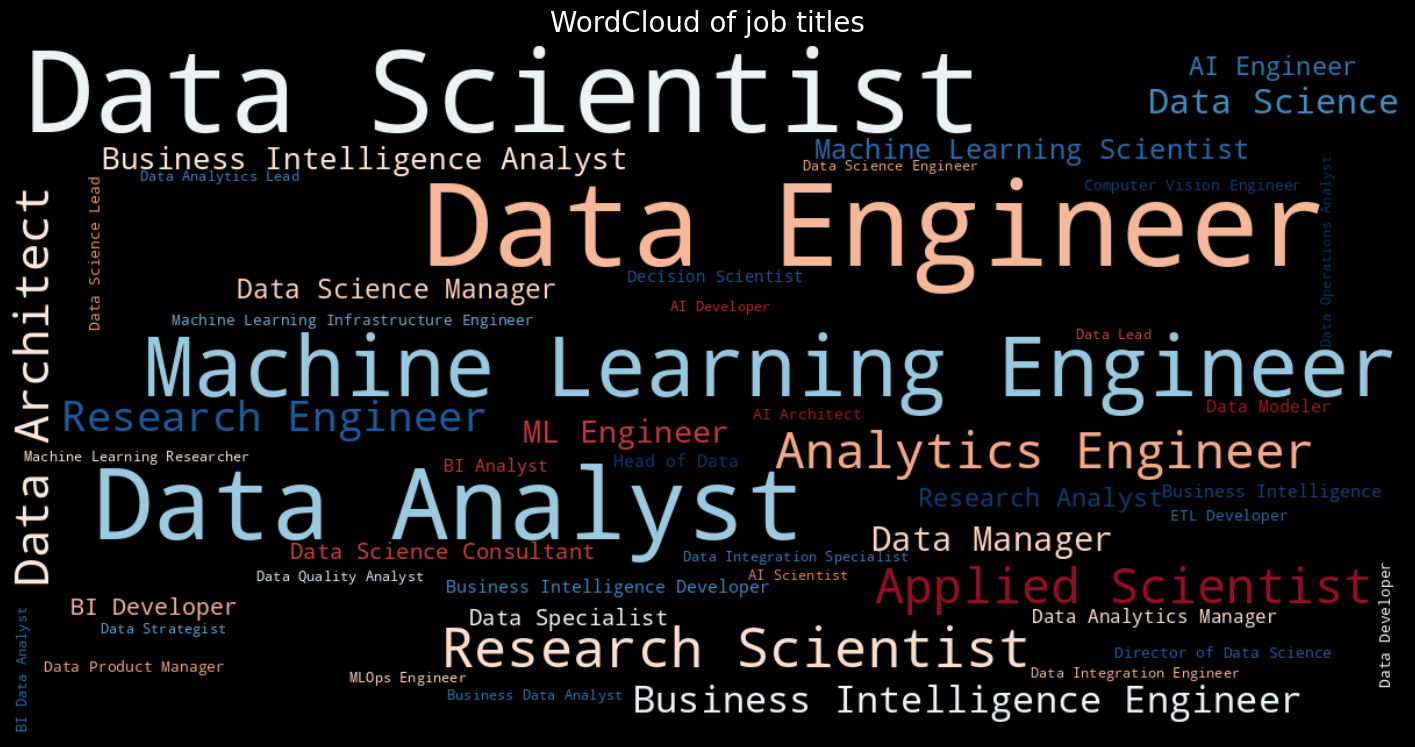

In [ ]:
#Word Cloud

#The function takes a list of cleaned words (cleanwordlist) and uses
#NLTK to create a frequency distribution (Freq_dist_nltk),
#which counts how often each word appears.
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)

#Converting to DataFrame: The function converts this frequency distribution into a
#Pandas DataFrame (df_freq), with terms as the index and their frequencies as the column.
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')

#Renaming the column: The column is named 'Frequency', and the index is named 'Term'.
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'

#The DataFrame is sorted in descending order by frequency.
#The index is reset to convert it back to a regular column.

    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()

#The resulting DataFrame is returned
    return df_freq

#Word_Cloud Function:
#Set Plot Size: It sets the size of the plot to 18x12 inches.
#Create Word Cloud: It creates a Word Cloud using the provided data, with various customization options:
def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (18,12))
    wc = WordCloud(width=1200,
               height=600,
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88,
               background_color=color_background).generate_from_frequencies(data)

#Display Word Cloud: It displays the word cloud using plt.imshow(),
#removes the axis with plt.axis('off'), sets the title, and shows the plot.
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

#Create Frequency DataFrame: The Freq_df function is called with the list of
#job titles from the DataFrame (df['job_title'].values.tolist()).
#This creates a frequency DataFrame (freq_df).
freq_df = Freq_df(df['job_title'].values.tolist())

#The frequency DataFrame is converted to a dictionary (data), with terms as keys and their frequencies as values.
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

#Generate Word Cloud
Word_Cloud(data ,'black','RdBu', 'WordCloud of job titles')


Here are some other job titles



1.2: Categories of experience level


There's 4 categorical values  in column 'Experience Level', each are:

EN, which refers to Entry-level / Junior

MI, which refers to Mid-level / Intermediate

SE, which refers to Senior-level / Expert

EX, which refers to Executive-level / Director

In [ ]:
# Replace shorthand experience level codes with full descriptions
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

# Count the occurrences of each experience level
ex_level = df['experience_level'].value_counts()

# Create a treemap using Plotly Express
fig = px.treemap(ex_level,
                 path=[ex_level.index],  # Define the hierarchy of the treemap using the experience levels
                 values=ex_level.values, # Define the values (counts) for each experience level
                 title = '1.2: Experience Level', # Set the title of the treemap
                 color=ex_level.index,  # Set the color of the treemap based on the experience levels
                 color_discrete_sequence=px.colors.sequential.PuBuGn, # Set the color scheme for the treemap
                 template='plotly_dark', # Set the template for the treemap
                 width=1000, height=500)

# Calculate the percentage of each experience level and round to two decimal places
percents = np.round((100*ex_level.values / sum(ex_level.values)).tolist(),2)

# Assign custom data to the treemap for display
fig.data[0].customdata = [35.09, 46.13, 4.28 , 14.5]

# Define the text template to show label, value, and custom percentage data
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

# Update the layout to use a specific font and size
fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))

# Show the treemap
fig.show()

1.3 Experience level with employment type

In [ ]:
# Group the data by experience level and employment type, and count the occurrences
exlevel_type = df.groupby(['experience_level','employment_type']).size()

# Create a bar chart figure with Plotly
fig = go.Figure(data=[
    # Add a bar for Entry-level/Junior experience level
    go.Bar(name='Entry-level/Junior', x=exlevel_type['Entry-level/Junior'].index, y=exlevel_type['Entry-level/Junior'].values,
           text=exlevel_type['Entry-level/Junior'].values, marker_color='white'),

    # Add a bar for Executive-level/Director experience level
    go.Bar(name='Executive-level/Director', x=exlevel_type['Executive-level/Director'].index, y=exlevel_type['Executive-level/Director'].values,
           text=exlevel_type['Executive-level/Director'].values, marker_color='red'),

    # Add a bar for Mid-level/Intermediate experience level
    go.Bar(name='Mid-level/Intermediate', x=exlevel_type['Mid-level/Intermediate'].index, y=exlevel_type['Mid-level/Intermediate'].values,
           text=exlevel_type['Mid-level/Intermediate'].values, marker_color='yellow'),

    # Add a bar for Senior-level/Expert experience level
    go.Bar(name='Senior-level/Expert', x=exlevel_type['Senior-level/Expert'].index, y=exlevel_type['Senior-level/Expert'].values,
           text=exlevel_type['Senior-level/Expert'].values, marker_color='blue'),
])
# Update the layout of the figure
## Rotate the x-axis labels by -45 degrees for better readability
fig.update_layout(xaxis_tickangle=-45, title='1.3: Experience Level with Employment Type', font = dict(family="Franklin Gothic", size=17), template='plotly_dark')

fig.show()


The employment types represented by these abbreviations are:

CT: Contract
FT: Full-Time
FL: Freelance
PT: Part-Time

It is clear that Senior-level/Experts acquire the majority of jobs in the Data Science industry, predominantly with Full-Time contracts. This is followed by Mid-level and Entry-level roles. Executive-level positions have the lowest number of Full-Time roles, with roughly 440 positions. Additionally, Contract, Freelance, and Part-Time roles have the lowest number of acquisitions.

**Possible Reasons:**

1. **Demand for Expertise**: The high percentage of Full-Time roles for Senior-level/Experts indicates a strong demand for experienced professionals who can lead projects and make strategic decisions.
2. **Stability and Commitment**: Companies may prefer Full-Time employment to ensure stability and commitment from their most skilled employees.
3. **Cost Considerations**: Entry-level roles are more numerous than executive positions due to the lower cost of hiring less experienced workers.
4. **Specialized Skills for Executives**: The lower number of Full-Time executive roles may be due to the specialized skills and extensive experience required for these positions, making them less common.
5. **Project-Based Work**: Contract, Freelance, and Part-Time roles are less prevalent, possibly due to the project-based nature of such work which is less suited to the ongoing, strategic needs of data science departments.


2. Employee Residence & Company Location
Where do the employees live and work?

2.1 Map Distribution

In [ ]:
#Converting country to choropleth readable type:
converted_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = converted_country

In [ ]:
# Count the occurrences of each unique value in the 'employee_residence' column
residence = df['employee_residence'].value_counts()

# Create a choropleth map using Plotly Express
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    template='plotly_dark',
                    title = '2.1: Employee Location Distribution Map')

# Update the layout of the figure
fig.update_layout(font = dict(size= 17, family="Franklin Gothic"))
fig.show()


According to the map, most employees and the companies they work for reside in USA

2.2 Top 10 Locations

In [ ]:
# Select the top 10 employee locations from the 'residence' series
top10_employee_location = residence[:10]

# Create a bar chart using Plotly Express
fig = px.bar(y=top10_employee_location.values,
             x=top10_employee_location.index,
             color = top10_employee_location.index,
             color_discrete_sequence=px.colors.sequential.deep,
             text=top10_employee_location.values,
             title= '2.2: Top 10 Locations of Employees',
             template= 'plotly_dark')

# Update the layout of the figure
fig.update_layout(
    xaxis_title="Location of Employee",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [ ]:
# Convert company location names to ISO3 country codes using the Country Converter (coco) library
converted_country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = converted_country
c_location = df['company_location'].value_counts()

# Select the top 10 company locations from the 'c_location' series
top_10_company_location = c_location[:10]
fig = go.Figure(data=[

    # Create the first bar for employee locations
    go.Bar(name='Employee Loaction',
           x=top10_employee_location.index, y=top10_employee_location.values,
           text=top10_employee_location.values,marker_color='red'),

    # Create the second bar for company locations
    go.Bar(name='Company Location', x=top_10_company_location.index,
           y=top_10_company_location.values,text=top_10_company_location.values,marker_color='yellow')
])

# Update the layout of the figure
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='2.2.(1) Comparison of Employee Location and Company Location',template='plotly_dark',
                  font = dict(size=17,family="Franklin Gothic"))

fig.show()

**Geographical Distribution of Employees:**

According to the map, the majority of employees and the companies they work for are based in the USA. The bar graph further illustrates this, showing that the USA leads with a staggering 12,926 employees in the Data Industry, compared to Great Britain with 647 employees and Canada with 390 employees, both barely reaching 1,000.

**Possible Reasons:**

The dominance of the USA in the Data Industry can be attributed to several factors. The USA has a large number of tech hubs, such as Silicon Valley, which attract top talent and numerous data-driven companies. The country's strong emphasis on innovation and technology, along with significant investments in research and development, create abundant opportunities in the field. Additionally, the presence of leading universities and research institutions fosters a skilled workforce. In contrast, while Great Britain and Canada have growing tech industries, they have smaller populations and fewer tech hubs, leading to lower overall numbers of data industry employees.

3. Salaries

3.1 Mean Salaries per work year

In [ ]:
# Filter the dataframe 'df' for each work year from 2020 to 2024
w2020 = df.loc[(df['work_year'] == 2020)]
w2021 = df.loc[(df['work_year'] == 2021)]
w2022 = df.loc[(df['work_year'] == 2022)]
w2023 = df.loc[(df['work_year'] == 2023)]  # Add this line
w2024 = df.loc[(df['work_year'] == 2024)]  # Add this line

# Create a list of salary data for each year
hist_data = [w2020['salary_in_usd'], w2021['salary_in_usd'], w2022['salary_in_usd'], w2023['salary_in_usd'], w2024['salary_in_usd']]  # Update this line
group_labels = ['2020 salary', '2021 salary', '2022 salary', '2023 salary', '2024 salary']
colors = ['white', 'red', 'blue', 'green', 'yellow']

# Create an empty DataFrame to store mean salaries for each year
year_salary = pd.DataFrame(columns=['2020', '2021', '2022', '2023', '2024'])

# Calculate mean salary for each year and assign to the DataFrame
year_salary['2020'] = w2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = w2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = w2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2023'] = w2023.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values  # Add this line
year_salary['2024'] = w2024.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values  # Add this line

# Create a bar chart using Plotly Express
fig1 = go.Figure(data=px.bar(x=year_salary.columns,
                              y=year_salary.values.tolist()[0],
                              color=year_salary.columns,
                              color_discrete_sequence=colors,
                              title='3.1: Mean Salary by Work Year',
                              text=np.round([num / 1000 for num in year_salary.values.tolist()[0]], 2),
                              # width = [year_salary.values.tolist()[0]],
                              template='plotly_dark',
                              height=500))
fig1.update_traces(width=0.3) # Set the width of the bars to 0.3

# Update the layout of the figure
fig1.update_layout(
    xaxis_title="Work Year",
    yaxis_title="Mean Salary (k)",
    font=dict(size=17, family="Franklin Gothic"))
fig1.show()



**Salary Trends Analysis:**

There are higher salary amounts in 2023 compared to the levels in 2024 and 2022. This increase might indicate a period where tech companies overhired. In contrast, the salary levels in 2021 and 2020 show similar, more stable trends.

**Possible Reasons:**

The spike in salaries in 2023 could be due to aggressive hiring practices by tech companies, possibly in response to increased demand for tech talent and rapid industry growth. This overhiring phase may have led to inflated salaries as companies competed for a limited pool of qualified candidates. The subsequent correction in 2024, along with the more stable trends observed in 2021 and 2020, suggests a market adjustment where salary levels returned to more sustainable rates after the hiring boom.

3.2 Salary by Experience Level

In [ ]:
# Select relevant columns for experience level and salary
exlevel_salary = df[['experience_level','salary_in_usd']]

# Filter the DataFrame for each experience level
entry_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Entry-level/Junior']
executive_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Executive-level/Director']
mid_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Mid-level/Intermediate']
senior_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Senior-level/Expert']

# Filter the DataFrame for each experience level
hist_data = [entry_salary['salary_in_usd'],mid_salary['salary_in_usd'],senior_salary['salary_in_usd'],executive_salary['salary_in_usd']]

# Define labels for each experience level
group_labels = ['Entry-level/Junior','Mid-level/Intermediate','Senior-level/Expert','Executive-level/Director']

# Define colors for each experience level
colors = ['white','yellow','blue','red']

# Calculate mean salary for each experience level
lst = [entry_salary['salary_in_usd'].mean(),
       mid_salary['salary_in_usd'].mean(),
       senior_salary['salary_in_usd'].mean(),
       executive_salary['salary_in_usd'].mean(),]

# Create a bar chart using Plotly Express
fig1 = go.Figure(data=px.bar(x= group_labels,
                            y=lst,
                            color = group_labels,
                            color_discrete_sequence= colors,
                            title='3.2: Mean Salary by Experience Level',
                            text = np.round([num/1000 for num in lst],2),
                            template = 'plotly_dark',
                            height=500))

# Update the layout of the figure
fig1.update_traces(width=0.4)
fig1.update_layout(
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (k) ",
    font = dict(size=17,family="Franklin Gothic"))
fig1.show()

**Mean Salary Analysis:**

According to the Mean Salary Graph, Executive-level jobs have the highest average salary at approximately 194.73 thousand USD, while Entry-level jobs have the lowest at around 91.66 thousand USD. Mid-level and Senior-level positions fall in between, with average salaries of $125.39 thousand USD and 163.7 thousand USD, respectively.

**Possible Reasons:**

The significant difference in salaries can be attributed to the varying levels of experience, responsibility, and skills required at each job level. Executive-level roles demand extensive experience, strategic decision-making capabilities, and leadership skills, justifying their higher salaries. Senior-level positions, while requiring substantial experience and expertise, offer slightly lower compensation. Mid-level roles are compensated well due to their requirement for a moderate level of experience and ability to manage projects independently. Entry-level positions have the lowest salaries as they are often filled by individuals who are just beginning their careers and require more training and supervision.

3.3 Salary by Company Size

In [ ]:
# Selecting relevant columns 'company_size' and 'salary_in_usd' from the DataFrame
c_size = df[['company_size','salary_in_usd']]

# Filtering data based on company size categories: Small (S), Mid (M), Large (L)
small = exlevel_salary.loc[c_size['company_size']=='S']
mid = exlevel_salary.loc[c_size['company_size']=='M']
large = exlevel_salary.loc[c_size['company_size']=='L']

# Creating a list of salary data for each company size category
hist_data = [small['salary_in_usd'],mid['salary_in_usd'],large['salary_in_usd']]
group_labels = ['Company Size: Small','Company Size: Mid','Company Size: Large']
colors = ['white','red','blue']

#Calculating mean salaries for each company size category
lst = [small['salary_in_usd'].mean(),
       mid['salary_in_usd'].mean(),
       large['salary_in_usd'].mean()]


# Setting the figure size for plotting
plt.figure(figsize=(20,5))

# Creating a Plotly bar plot using Plotly Express
fig1 = go.Figure(data=px.bar(x= group_labels,
                            y=lst,
                            color = group_labels,
                            color_discrete_sequence= colors,
                            title='3.3 Mean Salary by Company Size',
                            text = np.round([num/1000 for num in lst],2),
                            template = 'plotly_dark',
                            height=500))

# Updating the layout of the figure
fig1.update_traces(width=0.3)
fig1.update_layout(
    xaxis_title="Company Size",
    yaxis_title="Mean Salary (k)",
    font = dict(size=17,family="Franklin Gothic"))

# Displaying the figure
fig1.show()

<Figure size 2000x500 with 0 Axes>

**Mean Salary Comparison by Company Size:**

Mid-size companies have the highest mean salaries, topping at approximately 151.45k, followed by large companies at 139.6k. Small companies have the lowest mean salaries, topping at 86.61k.

This trend suggests that mid-size companies may offer higher compensation potentially due to their ability to generate revenue and scale operations effectively while maintaining a more direct relationship with employees. Large companies, although still offering competitive salaries, may face challenges such as higher operational costs and organizational complexities that influence their salary structures. Small companies, with fewer resources and less established market positions, typically offer lower salaries as they prioritize sustainability and growth over higher compensation packages.

In [ ]:
# Grouping the DataFrame by 'salary_in_usd' and 'job_title', then calculating the size of each group
salary_job = df.groupby(['salary_in_usd','job_title']).size().reset_index()

# Selecting the top 20 highest salary records based on 'salary_in_usd' and 'job_title'
salary_job = salary_job[-20:]

# Creating a bar chart using Plotly Express
fig = px.bar(x=salary_job['job_title'],y=salary_job['salary_in_usd'],text = salary_job['salary_in_usd'],
                   color = salary_job['salary_in_usd'], color_discrete_sequence=px.colors.sequential.PuBu)

# Updating the layout of the figure
fig.update_layout(
    xaxis_title="Job Title",
    yaxis_title="Salaries ")
# fig.update_traces(width=0.9)
fig.update_layout(barmode = 'relative',xaxis_tickangle=-45,
                  title='3.4: Top 20 Highest Salary by Job Title', template='plotly_dark',font = dict(size=17,family="Franklin Gothic"))

Collected here are the 20 highest salaries listed by job titles.

3.5 Average Salary by Company Location

In [ ]:
# Grouping the DataFrame by 'salary_in_usd' and 'company_location', then calculating the size of each group
salary_location = df.groupby(['salary_in_usd','company_location']).size().reset_index()
average = salary_location.groupby('company_location').mean().reset_index()

# Creating a choropleth map using Plotly Express
fig = px.choropleth(locations=average['company_location'],
                    color=average['salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.solar,
                    template='plotly_dark',
                    title = '3.5: Average Salary by Company Location')
# Updating the layout of the figure
fig.update_layout(font = dict(size=17,family="Franklin Gothic"))
fig.show()

**Average Salary Visualization:**

In our visualization, higher average salaries are represented by brighter colors, while lower average salaries appear in darker shades. Notably, countries such as the USA, Canada, and Saudi Arabia stand out with brighter colors, indicating higher average salaries.

This color contrast effectively highlights the disparities in average salaries across different regions, underscoring the economic dynamics and opportunities prevalent in these countries compared to others.